# Breast Cancer Diagnosis Prediction Model Development

### Python Library Imports

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, PrecisionRecallDisplay, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn import tree

## Creating Patient Data Frame with All Tumor Features

# Dataset Downloaded From Kaggle for Analysis

## *Data represents characteristics of cellular nuclei present in digitized images of fine needle aspirate (FNA) breast mass tissue samples taken from Wisconsin patients.*

In [148]:
df = pd.read_csv('C:\\Gene_Data\\Cancer_ML_Data\\Kaggle_Data\\breast-cancer.csv')
df = df.drop(columns='id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### DataFrame Legend
---
*B = Benign <br>*
*M = Malignant <br>*
*Mean = Average of entire sample <br>*
*SE = Standard error<br>*
*Worst = Most extreme data points in sample (mean of 3 largest values)*

### Splitting Data into Input and Output Variables
###### X = Input (Tumor Characteristics)
###### Y = Output (Diagnosis)

In [149]:
X = df.drop(columns=['diagnosis'])
Y = df['diagnosis'] == 'M'
Y

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

### Building and Application of Machine Learning Models

In [81]:
Algorithms = ['Linear_SVM', 'Polynomial_SVM', 'Decision_Tree', 'Random_Forest', 'Neural_Network', 'AdaBoost', 'Naive_Bayes', 'QDA', 'SGD']

classifiers = [SVC(kernel='linear'), SVC(kernel='poly'), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier(), AdaBoostClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis(), SGDClassifier()]

### Collection of Model Quality Scores

In [82]:
Acc_scores = []
Prec_scores = []
Rec_scores = []
F1_scores = []
for Alg, clf in zip(Algorithms, classifiers):
    Acc_score = []
    Prec_score = []
    Rec_score = []
    F1_score = []
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    splits = list(kf.split(X))
    for train_indices, test_indices in splits:
        X_train = X.iloc[train_indices]
        X_test = X.iloc[test_indices]
        Y_train = Y.iloc[train_indices]
        Y_test = Y.iloc[test_indices]
        clf.fit(X_train,Y_train)
        y_pred = clf.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
        Acc_score.append(clf.score(X_test,Y_test))
        Rec_score.append(tp / (tp + fn))
        Prec_score.append(tp / (tp + fp))
    for x, y in zip(Prec_score, Rec_score):
        F1_score.append(2*((x * y)/(x + y)))
    Acc_scores.append(sum(Acc_score)/len(Acc_score))
    Rec_scores.append(sum(Rec_score)/len(Rec_score))
    Prec_scores.append(sum(Prec_score)/len(Prec_score))
    F1_scores.append(sum(F1_score)/len(F1_score))

### Model Quality Score Data Frame

In [83]:
df_scores = pd.DataFrame({'Accuracy': Acc_scores, 'Precision': Prec_scores, 'Recall': Rec_scores, 'F1': F1_scores}, index=Algorithms)
df_scores

,Accuracy,Precision,Recall,F1
Linear_SVM,0.949029,0.950616,0.909035,0.927390
Polynomial_SVM,0.908427,0.955963,0.792051,0.859027
Decision_Tree,0.934868,0.918396,0.908638,0.910229
Random_Forest,0.952538,0.955468,0.919860,0.934448
Neural_Network,0.938503,0.952001,0.875531,0.909803
AdaBoost,0.963095,0.972244,0.927539,0.948626
Naive_Bayes,0.941980,0.949926,0.894258,0.919189
QDA,0.959524,0.947914,0.943868,0.944658
SGD,0.856015,0.881507,0.794210,0.804537


### Model Performance Heatmap and Barplot

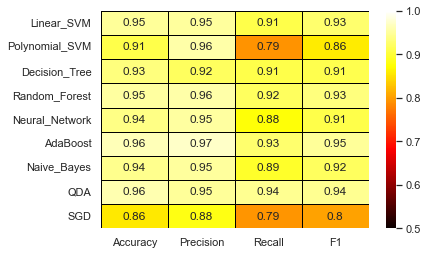

In [84]:
sns.set(font_scale=1)
ax = sns.heatmap(df_scores, linewidths=1, linecolor='black', cmap='hot', annot=True, vmin=0.5, vmax=1)

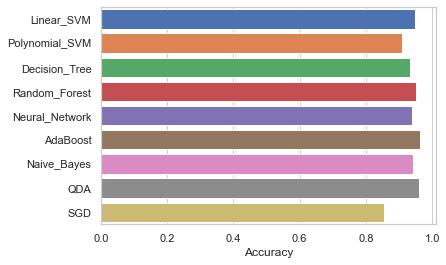

In [85]:
sns.set(style='whitegrid')
ax = sns.barplot(y=df_scores.index, x=df_scores['Accuracy'], data=df_scores, saturation=1)

## Analyzing model Performance with Each Individual Tumor Characteristicc

In [86]:
columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [87]:
characteristics = []

for x in columns:
    x = x.replace('_', ' ')
    x = x.replace('se', 'standard error')
    x = x.capitalize()
    characteristics.append(x)
    
df_feat = pd.DataFrame(index=characteristics)

### Empty DataFrame for Quality Scores

In [88]:
df_feat.head()

""
Radius mean
Texture mean
Perimeter mean
Area mean
Smoothness mean


### Collection of Model Accuracy Scores

In [133]:
for Alg, clf in zip(Algorithms, classifiers):
    Acc_lim_scores = []
    for feature in columns:
        Acc_score = []
        X2 = pd.DataFrame(X[feature])
        kf = KFold(n_splits=10, shuffle=True, random_state=1)
        splits = list(kf.split(X))
        for train_indices, test_indices in splits:
            X_train = X2.iloc[train_indices]
            X_test = X2.iloc[test_indices]
            Y_train = Y.iloc[train_indices]
            Y_test = Y.iloc[test_indices]
            clf.fit(X_train,Y_train)
            Acc_score.append(clf.score(X_test,Y_test))
        Acc_lim_scores.append(sum(Acc_score)/len(Acc_score))
    df_feat[Alg] = Acc_lim_scores

In [134]:
df_feat_sorted = df_feat.sort_values(by=['Random_Forest', 'AdaBoost'], ascending=False)
df_feat_sorted.head()

,Linear_SVM,Polynomial_SVM,Decision_Tree,Random_Forest,Neural_Network,AdaBoost,Naive_Bayes,QDA,SGD
Concave points worst,0.880514,0.910401,0.889286,0.898058,0.912155,0.905138,0.906861,0.906861,0.908647
Area worst,0.910276,0.917325,0.880420,0.882174,0.815414,0.903289,0.913722,0.913722,0.499311
Perimeter worst,0.913910,0.913878,0.871648,0.875125,0.908521,0.880420,0.915570,0.915570,0.751974
Radius worst,0.913816,0.917356,0.869987,0.871742,0.906736,0.913847,0.908490,0.908490,0.869862
Concave points mean,0.688847,0.906892,0.850627,0.852381,0.864536,0.901629,0.905138,0.905138,0.875313


### Model Accuracy Heatmap

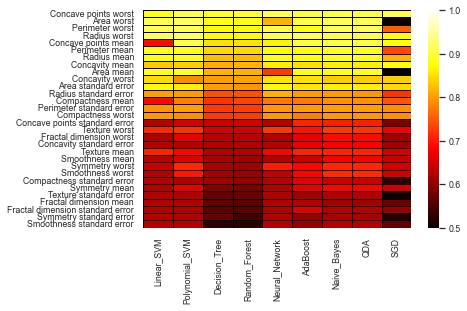

In [135]:
sns.set(font_scale=.8)
ax = sns.heatmap(df_feat_sorted, linewidths=1, linecolor='black', cmap='hot', yticklabels=df_feat_sorted.index, vmin=0.5, vmax=1)

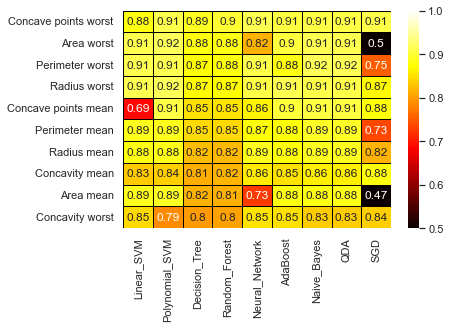

In [136]:
sns.set(font_scale=1)
ax = sns.heatmap(df_feat_sorted.iloc[:10], linewidths=1, linecolor='black', cmap='hot', yticklabels=df_feat_sorted.index[:10], vmin=0.5, vmax=1, annot=True)

### Five most influencial features for predicting breast cancer tumor status:
1. Worst Concave Points: Greatest number of concave points in surface contour
2. Worst Area: Greatest nuclei area in sample
3. Worst Perimeter: Greatest nucleus perimeter in sample
4. Worst Radius: Greatest distance from center to perimeter of nucleus
5. Mean Concave Points: Average number of concave points in surface contour across entire sample

In [132]:
df_corr = df
df_corr['diagnosis'].replace('M', 1, inplace=True)
df_corr['diagnosis'].replace('B', 0, inplace=True)

In [100]:
corr_matrix = df_corr.corr().round(3)
corr_df = pd.DataFrame(corr_matrix['diagnosis'].sort_values(ascending=False))
corr_df.head(10)

,diagnosis
diagnosis,1.000
concave points_worst,0.794
perimeter_worst,0.783
concave points_mean,0.777
radius_worst,0.776
perimeter_mean,0.743
area_worst,0.734
radius_mean,0.730
area_mean,0.709
concavity_mean,0.696


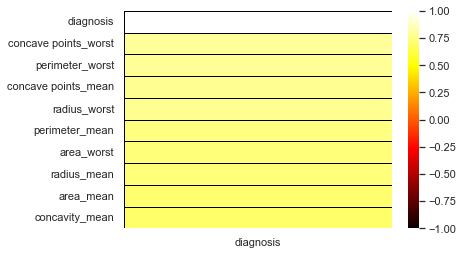

In [101]:
sns.set(font_scale=1)
ax = sns.heatmap(corr_df.head(10), linewidths=1, linecolor='black', cmap='hot',vmin=-1, vmax=1)

## Visualization of Information Gain from Most and Least Influencial Tumor Features

[Text(0.5, 1.0, 'Highest Information Gain'),
 Text(0.5, 0, 'Worst Concave Points'),
 Text(0, 0.5, 'Worst Perimeter')]

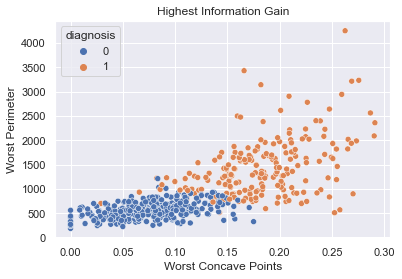

In [102]:
sns.scatterplot(x ='concave points_worst', y ='area_worst', data=df, hue=df['diagnosis']).set(title='Highest Information Gain', xlabel='Worst Concave Points', ylabel='Worst Perimeter')

[Text(0.5, 1.0, 'Lowest Information Gain'),
 Text(0.5, 0, 'Smoothness Standard Error'),
 Text(0, 0.5, 'Symmetry Standard Error')]

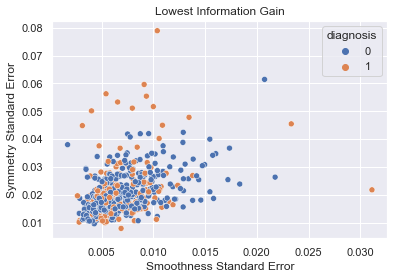

In [103]:
sns.scatterplot(x ='smoothness_se', y ='symmetry_se', data=df, hue=df['diagnosis']).set(title='Lowest Information Gain', xlabel='Smoothness Standard Error', ylabel='Symmetry Standard Error')

## DataFrame of Most Influencial Tumor Features

In [150]:
df_limited = df.drop(columns=['texture_mean', 'perimeter_mean', 'smoothness_mean', 'concavity_mean',
        'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis', 'radius_mean', 'area_mean', 'symmetry_mean', 'compactness_mean'])
df_limited

,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,0.14710,25.380,184.60,2019.0,0.2654
1,0.07017,24.990,158.80,1956.0,0.1860
2,0.12790,23.570,152.50,1709.0,0.2430
3,0.10520,14.910,98.87,567.7,0.2575
4,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...
564,0.13890,25.450,166.10,2027.0,0.2216
565,0.09791,23.690,155.00,1731.0,0.1628
566,0.05302,18.980,126.70,1124.0,0.1418
567,0.15200,25.740,184.60,1821.0,0.2650


### Splitting of Data Into input and Output Variables

In [157]:
X2 = df_limited
Y2 = df['diagnosis']

### Collection of Model Quality Scores

In [106]:
Algorithms_lim = ['Linear_SVM', 'Polynomial_SVM', 'Decision_Tree', 'Random_Forest', 'Neural_Network', 'AdaBoost', 'Naive_Bayes', 'QDA']
classifiers_lim = [SVC(kernel='linear'), SVC(kernel='poly'), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier(), AdaBoostClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis()]

In [107]:
Acc_lim_scores = []
Prec_lim_scores = []
Rec_lim_scores = []
F1_lim_scores = []
for Alg, clf in zip(Algorithms_lim, classifiers_lim):
    Acc_score = []
    Prec_score = []
    Rec_score = []
    F1_score = []
    kf = KFold(n_splits=20, shuffle=True, random_state=1)
    splits = list(kf.split(X))
    for train_indices, test_indices in splits:
        X_train = X2.iloc[train_indices]
        X_test = X2.iloc[test_indices]
        Y_train = Y2.iloc[train_indices]
        Y_test = Y2.iloc[test_indices]
        clf.fit(X_train,Y_train)
        y_pred = clf.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
        Acc_score.append(clf.score(X_test,Y_test))
        Rec_score.append(tp / (tp + fn))
        Prec_score.append(tp / (tp + fp))
    for x, y in zip(Prec_score, Rec_score):
        F1_score.append(2*((x * y)/(x + y)))
    Acc_lim_scores.append(sum(Acc_score)/len(Acc_score))
    Rec_lim_scores.append(sum(Rec_score)/len(Rec_score))
    Prec_lim_scores.append(sum(Prec_score)/len(Prec_score))
    F1_lim_scores.append(sum(F1_score)/len(F1_score))

In [108]:
df_limited_scores = pd.DataFrame({'Accuracy': Acc_lim_scores, 'Precision': Prec_lim_scores, 'Recall': Rec_lim_scores, 'F1': F1_lim_scores}, index=Algorithms_lim)
df_limited_scores

,Accuracy,Precision,Recall,F1
Linear_SVM,0.919458,0.916962,0.865823,0.883314
Polynomial_SVM,0.917549,0.946313,0.823353,0.874294
Decision_Tree,0.926355,0.919755,0.886655,0.897096
Random_Forest,0.936946,0.927216,0.907623,0.912951
Neural_Network,0.893165,0.915210,0.794444,0.839538
AdaBoost,0.931835,0.918557,0.909268,0.908055
Naive_Bayes,0.949261,0.952758,0.909513,0.926936
QDA,0.936946,0.943181,0.882064,0.906407


### Model Performance Heatmap with Limited Tumor Characteristics

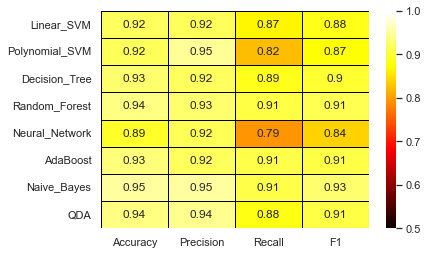

In [109]:
sns.set(font_scale=1)
ax = sns.heatmap(df_limited_scores, linewidths=1, linecolor='black', cmap='hot', annot=True, vmin=0.5, vmax=1)

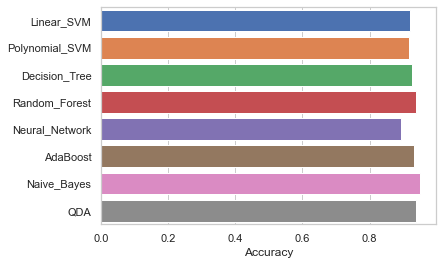

In [110]:
sns.set(style='whitegrid')
ax = sns.barplot(y=df_limited_scores.index, x=df_limited_scores['Accuracy'], data=df_limited_scores, saturation=1)

## Random Forest Hyperparameter Tuning

In [201]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.15, random_state=1)

In [206]:
model = RandomForestClassifier()
max_features = np.arange(1, 11, 1)
n_estimators = np.arange(10, 160, 5)
param_grid = {'n_estimators':n_estimators, 'max_features': max_features}
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
gs.fit(X2_train, Y2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155])})

## Random Forest Optimal Accuracy

In [208]:
print(gs.best_score_, gs.best_params_)

0.9483032646048111 {'max_features': 2, 'n_estimators': 50}


In [209]:
pd.set_option('display.max_rows', 50)
grid_results = pd.concat([pd.DataFrame(gs.cv_results_['mean_test_score'], columns=['accuracy'])])
grid_results[['max_features', 'n_estimators']] = pd.DataFrame(gs.cv_results_['params'])
grid_results

,accuracy,max_features,n_estimators
0,0.933763,1,10
1,0.940056,1,15
2,0.933784,1,20
3,0.940013,1,25
4,0.937973,1,30
...,...,...,...
295,0.940013,10,135
296,0.940013,10,140
297,0.942075,10,145
298,0.942075,10,150


In [210]:
grid_contour = grid_results.groupby(['max_features', 'n_estimators']).mean()
grid_contour

accuracy
max_features n_estimators          
1            10            0.933763
             15            0.940056
             20            0.933784
             25            0.940013
             30            0.937973
...                             ...
10           135           0.940013
             140           0.940013
             145           0.942075
             150           0.942075
             155           0.940013

[300 rows x 1 columns]

In [211]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot.head()

Accuracy                                                    \
n_estimators       10        15        20        25        30        35    
max_features                                                               
1             0.933763  0.940056  0.933784  0.940013  0.937973  0.942075   
2             0.937951  0.937973  0.933827  0.940013  0.935868  0.937930   
3             0.937930  0.933806  0.929639  0.935868  0.929639  0.942053   
4             0.940013  0.935846  0.937951  0.939991  0.935868  0.935846   
5             0.929661  0.937951  0.942075  0.944180  0.935868  0.940013   

                                                      ...                      \
n_estimators       40        45        50        55   ...       110       115   
max_features                                          ...                       
1             0.944158  0.944180  0.942096  0.937951  ...  0.940034  0.940034   
2             0.944180  0.942118  0.948303  0.946241  ...  0.940034  0.942096   
3             0.937930  0.944158  0.942096  0.940034  ...  0.942096  0.946220   
4             0.942096  0.935846  0.937908  0.944158  ...  0.944137  0.940013   
5             0.942096  0.933806  0.942096  0.942096  ...  0.939991  0.942075   

                                                                          \
n_estimators       120       125       130       135       140       145   
max_features                                                               
1             0.946220  0.944180  0.944158  0.946241  0.942096  0.942096   
2             0.944158  0.948303  0.946220  0.944158  0.946220  0.942096   
3             0.942075  0.946220  0.946220  0.942075  0.944158  0.942075   
4             0.942053  0.942053  0.942075  0.942075  0.944158  0.944137   
5             0.942075  0.942075  0.939991  0.942075  0.944158  0.942075   

                                  
n_estimators       150       155  
max_features                      
1             0.944137  0.942096  
2             0.944158  0.944158  
3             0.944158  0.944158  
4             0.942075  0.944137  
5             0.939991  0.940013  

[5 rows x 30 columns]

In [220]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

In [221]:
layout = go.Layout(xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='max features')), yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='n estimators')))

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout)

fig.update_layout(title = 'Random Forest Hyperparameter Tuning', autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [214]:
fig = go.Figure(data = [go.Surface(z=z, y=y, x=x)], layout=layout)
fig.update_layout(title='Random Forest Hyperparameter Tuning', scene = dict(xaxis_title='n estimators', yaxis_title='max features', zaxis_title='Accuracy'), autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))

fig.show()

## AdaBoost Hyperparameter Tuning

In [174]:
model = AdaBoostClassifier()
n_estimators = np.arange(10, 260, 10)
learning_rate = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}
ada_gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
ada_gs.fit(X2_train, Y2_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250])})

## Optimal AdaBoost Accuracy

In [176]:
print(ada_gs.best_score_, ada_gs.best_params_)

0.9585481099656358 {'learning_rate': 0.1, 'n_estimators': 40}


In [177]:
ada_grid_results = pd.concat([pd.DataFrame(ada_gs.cv_results_['mean_test_score'], columns=['accuracy'])])
ada_grid_results[[ 'learning_rate','n_estimators']] = pd.DataFrame(ada_gs.cv_results_['params'])
ada_grid_results

,accuracy,learning_rate,n_estimators
0,0.946134,0.1,10
1,0.950279,0.1,20
2,0.952363,0.1,30
3,0.958548,0.1,40
4,0.958548,0.1,50
...,...,...,...
245,0.937908,1.0,210
246,0.939970,1.0,220
247,0.937908,1.0,230
248,0.937908,1.0,240


In [178]:
ada_grid_contour = ada_grid_results.groupby([ 'learning_rate', 'n_estimators']).mean()
ada_grid_contour

accuracy
learning_rate n_estimators          
0.1           10            0.946134
              20            0.950279
              30            0.952363
              40            0.958548
              50            0.958548
...                              ...
1.0           210           0.937908
              220           0.939970
              230           0.937908
              240           0.937908
              250           0.937908

[250 rows x 1 columns]

In [179]:
ada_grid_reset = ada_grid_contour.reset_index()
ada_grid_reset.columns = [ 'learning_rate','n_estimators', 'Accuracy']
ada_grid_pivot = ada_grid_reset.pivot('n_estimators', 'learning_rate')
ada_grid_pivot.head()

Accuracy                                                    \
learning_rate       0.1       0.2       0.3       0.4       0.5       0.6   
n_estimators                                                                
10             0.946134  0.944072  0.948217  0.950279  0.944051  0.946155   
20             0.950279  0.950279  0.950279  0.952341  0.950301  0.950301   
30             0.952363  0.952363  0.950279  0.952363  0.954424  0.950301   
40             0.958548  0.952341  0.954424  0.952363  0.950279  0.948239   
50             0.958548  0.954424  0.954424  0.954424  0.948217  0.952363   

                                                       
learning_rate       0.7       0.8       0.9       1.0  
n_estimators                                           
10             0.950279  0.942010  0.942032  0.942032  
20             0.942032  0.944115  0.946177  0.939927  
30             0.942053  0.946177  0.944094  0.948239  
40             0.942053  0.946177  0.942032  0.937908  
50             0.946177  0.944115  0.948239  0.939970

In [180]:
x = ada_grid_pivot.columns.levels[1].values
y = ada_grid_pivot.index.values
z = ada_grid_pivot.values

In [181]:
layout = go.Layout(xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='learning rate')), yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='n estimators')))

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout)

fig.update_layout(title = 'AdaBoost Hyperparameter Tuning', autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [182]:
fig = go.Figure(data = [go.Surface(z=z, y=y, x=x)], layout=layout)
fig.update_layout(title='AdaBoost Hyperparameter Tuning', scene = dict(xaxis_title='learning rate', yaxis_title='n estimators', zaxis_title='Accuracy'), autosize=False, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))

fig.show()

## Time Comparison Before and After Optimization

### Random Forest Model Time Comparison

In [217]:
%%timeit -n 100
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

389 ms ± 9.19 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [218]:
%%timeit -n 100
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.15, random_state=1)
model = RandomForestClassifier(max_features=2, n_estimators=50)
model.fit(X2_train, Y2_train)
model.score(X2_test, Y2_test)

166 ms ± 5.91 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### AdaBoost Model Time Comparison

In [216]:
%%timeit -n 100
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

298 ms ± 3.76 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [197]:
%%timeit -n 100
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.15, random_state=1)
model = AdaBoostClassifier(learning_rate=.1, n_estimators=40)
model.fit(X2_train, Y2_train)
model.score(X2_test, Y2_test)

72.6 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## **Random Forest: 57.3% Reduction <br> AdaBoost: 75.6% Reduction**